In [1]:
import numpy as np
import json
from pathlib import Path
import open3d as o3d
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
data_path = Path(r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\preprocessing\examples\output")

files = sorted(data_path.glob("frame*.json"))

data = []
for f in tqdm(files):
    with open(f, "r") as inp:
        data.append(json.load(inp)["frame"])

100%|██████████| 104/104 [00:49<00:00,  2.11it/s]


<Axes: >

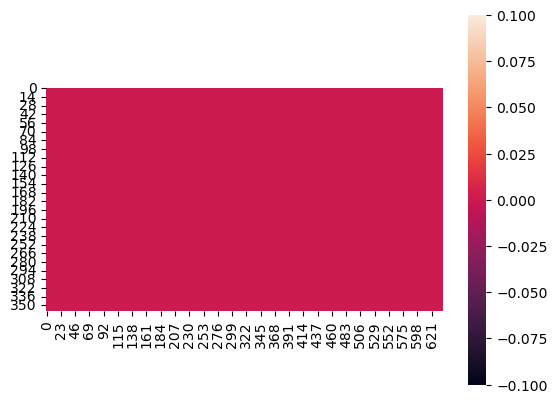

In [6]:
def to_valid_mask(data):
    return np.array([[x["valid"] for x in row] for row in data])

valids = to_valid_mask(data[50])

sns.heatmap(valids, square=True)

In [9]:
point_cloud = np.array([x["position"] for row in data[50] for x in row])
point_cloud.shape

(230400, 3)

In [17]:
accepted_pc = o3d.geometry.PointCloud()
accepted_pc.points = o3d.utility.Vector3dVector(point_cloud[point_cloud[:,2] < 0.25])
accepted_pc.estimate_normals()

o3d.visualization.draw_geometries([accepted_pc])

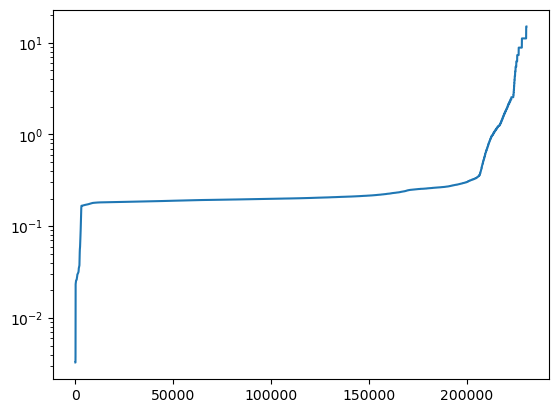

In [16]:
plt.plot(sorted(point_cloud[:,2]))
plt.yscale("log")